1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy import fftpack
from scipy.integrate import quad, quadrature

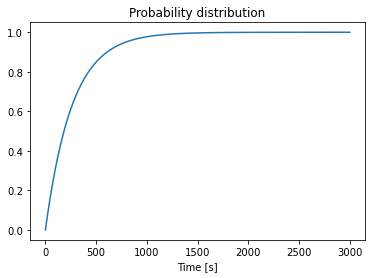

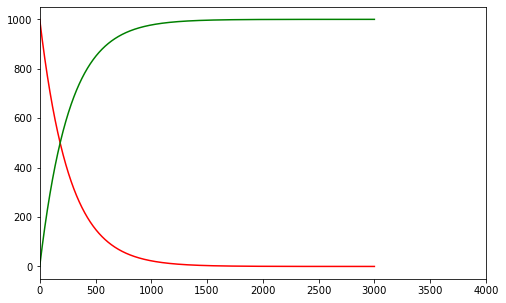

In [12]:
N0=1000
tau=3.052*60 #for second

def p(t):
 return 1-2**(-t/tau)

t=np.arange(3000)
y=p(t)
plt.plot(t,y)
plt.title("Probability distribution")
plt.xlabel("Time [s]")
plt.show()

#initial population of  Ti
N=np.array([N0])

#population of Pb
F=np.array([0])

for i in range(1,3000):
    N=np.append(N,N[i-1]-p(1)*N[i-1])
    F=np.append(F,F[i-1]+p(1)*N[i-1])
    
    

fig, ax = plt.subplots(figsize=(8, 5)) 
ax.plot(t, N , c='red')
ax.plot(t, F, c='green')
ax.set_xlim([0, 4000])
plt.show()



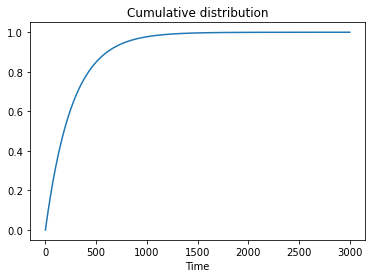

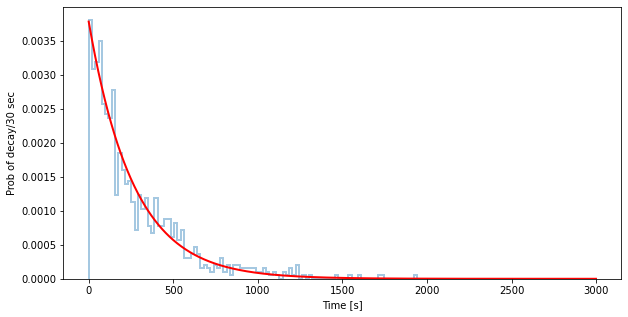

The integral of pdf:  1.0 +- 6.405522805374489e-12


In [17]:
def f(t):
    return (2**(-t/tau)*np.log(2)/tau)
def cdf(t):
    return 1-np.exp(-t*np.log(2)/tau)


y2=cdf(t)
plt.plot(t,y2)
plt.title("Cumulative distribution")
plt.xlabel("Time")
plt.show()

def inverse(y):
    return (-np.log(1-y)*tau/(np.log(2)))
u = np.random.random(1000)
v = inverse(u) 


#histogram
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(v, histtype='step', bins=100, density=True, linewidth=2,alpha=0.4, label="MC")
ax.plot(t, f(t) , c='red', label="Function",linewidth=2)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Prob of decay/30 sec")
plt.show()

result = quad(lambda x:f(x), 0, np.inf)


print("The integral of pdf: ",result[0],"+-",result[1])

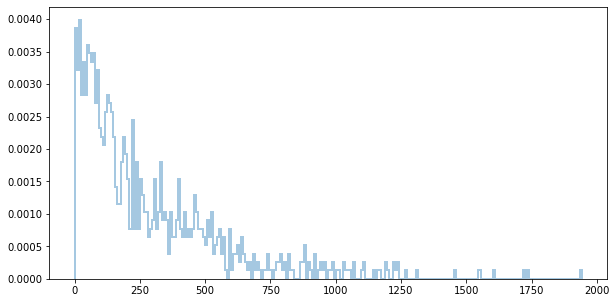

In [24]:
v = inverse(u)
factor=1
fig, ax = plt.subplots(figsize=(10, 5)) # create the figure and the axes
ax.hist(v, histtype='step', bins=250, density=True, linewidth=2,alpha=0.4,weights=factor*np.ones_like(v), label="MC")  # plot histogram of the sample v
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

(0.0, 1.1)

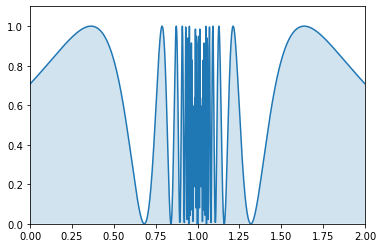

In [28]:
f = lambda x: np.sin(1 / (1-x))**2

x = np.linspace(0, 2, 1000)
plt.plot(x, f(x))
plt.fill_between(x, f(x), alpha = 0.2)
plt.xlim([0,2])
plt.ylim([0,1.1])

In [31]:
#Hit/miss method:

n_iter = 150 #num of iter
N = 15000 # num of points to sample
I_hms = []

for i in range(n_iter):    
    x = 2. * np.random.random(N) # random points in [0,2)
    y = np.random.random(N)      # random points in [0,1)
    I_hms.append(2.*np.sum(y < f(x))/N)
    
I_hm = np.mean(I_hms)
err_hm = np.std(I_hms)/np.sqrt(n_iter)
print(f'I = {I_hm:.5f} +- {err_hm:.5f}')

I = 1.34667 +- 0.00067


In [32]:
#mean value method: 

n_iter = 150
N = 15000 # num of points to sample
I_mvs = []

for i in range(n_iter):    
    x = 2. * np.random.random(N) # random points in [0,2)
    I_mvs.append(2. * np.sum(f(x)) / N)

I_mv = np.mean(I_mvs)
err_mv = np.std(I_mvs)/np.sqrt(n_iter)
print(f'I = {I_mv:.5f} +- {err_mv:.5f}')

I = 1.34692 +- 0.00040


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [33]:
def f(x,y):
    return x**2+y**2
count = 0
N=15000
for i in range(N):
    x = np.random.random()
    y = np.random.random()

    if f(x,y) < 1: count += 1
    I=4*count/N
print("Integral: ",I)

Integral:  3.143466666666667


In [38]:
#3D sphere
def f(a,b,c,):
    return a**2+b**2+c**2
count = 0
N=1000000
for i in range(N):
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()

    if f(a,b,c) < 1: count += 1
    I=8*count/N
print("Integral: ",I)

Integral:  4.186936


In [39]:
#10D shpere
def ften(a,b,c,d,f,g,h,j,k,l):
    return a**2+b**2+c**2+d**2+f**2+g**2+h**2+j**2+k**2+l**2

count = 0
N=9000000
for i in range(N):
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    d = np.random.random()
    f = np.random.random()
    g = np.random.random()
    h = np.random.random()
    j = np.random.random()
    k = np.random.random()
    l = np.random.random()


    if ften(a,b,c,d,f,g,h,j,k,l) < 1: count += 1
    I=2**10*count/N
print("Integral: ",I)


Integral:  2.5348551111111113


In [40]:
print("The analytical result: ", np.pi**5/120)


The analytical result:  2.550164039877345


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.


$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

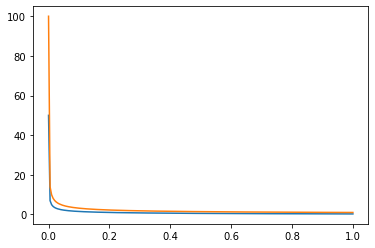

In [45]:
f = lambda x: x**-.5 / (1 + np.exp(x))
g = lambda x: x**-.5

x = np.linspace(0.0001, 1, 200)
plt.plot(x, f(x))
plt.plot(x, g(x))

In [47]:
n_iter = 200
N = 20000 # num of points
I_w = 2 # integral of the weight function
I_is = []

for i in range(n_iter):
    x = np.random.random(N)**2
    I_is.append(I_w * np.sum(f(x)/w(x)) / N)

I = np.mean(I_is)
err = np.std(I_is)/np.sqrt(n_iter)
print(f'I = {I:.5f} +- {err:.5f}')

I = 0.83890 +- 0.00007
